# Udacity st101: Intro to Statistics

Notes from [Udacity st101: Intro to statistics](https://www.udacity.com/course/intro-to-statistics--st101).

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Probability

The basic formula of probability:

$$ P(A) = 1 - P(\neg A) $$

### Conditional probability

Like for a disease we would like to detect, if our test is not 100% accurate:

$$ P(Test) = P(Test | Disease) * P(Disease) + P(Test | \neg Disease) * P(\neg Disease) $$

## Bayes Rules

$$ P(A|B) = \frac {P(B|A)P(A)} {P(B)} $$

In [29]:
pr = 0.5
pg = 0.5
p_seeR_atR = 0.8
p_seeG_atR = 0.2
p_seeG_atG = 0.5
p_seeR_atG = 0.5
normalize = pr * p_seeR_atR + pg * p_seeR_atG
print str((pr * p_seeR_atR) / normalize)
print str((pg * p_seeR_atG) / normalize)

0.615384615385
0.384615384615


In [30]:
print str(0.3 / 0.366)
print str(0.033 / 0.366)

0.819672131148
0.0901639344262


In [31]:
gone = 0.6
home = 0.4
rain_home = 0.01
norain_home = 0.99
rain_gone = 0.3
norain_gone = 0.7
norm = 0.4 * 0.01 + 0.6 * 0.3
print (norm)
print str((0.4 * 0.01) / norm)

0.184
0.0217391304348


#### Programming Bayes Rules

In [32]:
def f(p):
    return 3 * p * (1 - p) * (1 - p)
print str(f(0.5))

0.375


## Programming estimators

MLE vs. Laplace ???

#### Mean

In [33]:
data1=[49., 66, 24, 98, 37, 64, 98, 27, 56, 93, 68, 78, 22, 25, 11]

def mean(data):
    return sum(data) / len(data)

print mean(data1)

54.4


#### Median

In [34]:
# If ODD numbers only
data1=[1,2,5,10,-20]

def median(data):
    sdata = sorted(data)
    return sdata[(len(data) - 1) / 2]

print median(data1)

# If EVEN: we can either take the number OR the mean between median numbers

2


#### Mode

In [35]:
data1=[1,2,5,10,-20,5,5]

def mode(data):
    mode = 0
    index = 0
    for i in range(len(data)):
        if data.count(data[i]) > mode:
            index = i
            mode = data.count(data[i])

    return data[index]
    
print mode(data1)

5


#### Variance

$$ V(x) = \sigma^{2} ={\frac  1n}\sum _{{i=1}}^{n}(x_{i}-\mu)^{2} $$

In [36]:
data3=[13.04, 1.32, 22.65, 17.44, 29.54, 23.22, 17.65, 10.12, 26.73, 16.43]

def variance(data):
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])

print variance(data3)

62.572884


#### Standard deviation

$$ \sigma = \sqrt {V(x)} $$

In [37]:
from math import *
def stddev(data):
    return sqrt(variance(data))
    
print stddev(data3)

7.91030239624


#### Standard score

$$ \frac {x - \mu} {\sigma} $$

#### Variance correction factor

$$ \frac {n} {n - 1} $$

$ n $: \# data points in the sample

## Outliers: ignoring datas

Outliers means in french: "valeurs aberrantes".

#### Quartile

To avoid some extreme datas, we split dataset with 4 quartiles separated by 3 values (one in the center - could be the median if odd, one up, one down). So quartile will be $ 4n + 3 $ multiple.

#### Percentile

It means we are going to remove a certain percent of the dataset, i.e. the upper 20%.

## Binomial distribution

For example:

Let's flip 10 coins (n = 10), how much head = 5 (k = 5) do we have?

Answer is: $ \frac {10 * 9 * 8 * 7 * 6} {5 * 4 * 3 * 2 * 1} = 252 $

Formula is:
$$ \frac {n!} {k! (n - k)!} $$

The _binomial distribution_:

$$ \frac {n!} {k! (n - k)!} * p^k * (1 - p)^{n-k} $$

Where $k < n$, $p$ is the probability of $k$

## Central limit theorem

You take outcomes, you sum them up and you end up with a Gaussian. It is the basis of large datas statistic.

## Normal distribution

Binomial distribution > Central limit theorem > Normal distribution

Normal distribution formula:

$$ N(X; \mu, \sigma^{2}) = \frac {1} {\sqrt {2 \pi \sigma^{2}}} e^{- \frac {1} {2} \frac {(X - \mu)^2} {\sigma^{2}} } $$

We multiply by $ \frac {1} {\sqrt {2 \pi \sigma^{2}}} $ because this is the area behind the bell (integral), but we wan't a probability (sum equals to 1).

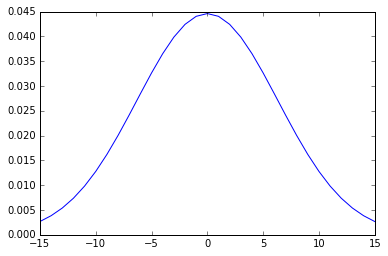

In [71]:
# Change variables and visualize how it change the bell
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Change range of X
datas = [x for x in range(-15, 16)]
# Choose mean and variance (use numpy functions for convenience)
mean = np.mean(datas)
var = np.var(datas)

def normal_distribution(X, mean, var):
    """Compute normal distribution.
    
    In other words, it computes the repartition of a large number of datas according to mean and variance.
    
    Args:
        X (scalar or list): Datas
        mean (scalar): Mean
        Var (scalar): Variance
    
    Returns:
        Normal distribution value (scalar or list)
    """
    factor = 1 / (np.sqrt(2 * np.pi * var))
    expone = np.exp((- 1 / 2) * np.divide(np.square(np.subtract(X, mean)), var))
    n_dist = np.multiply(factor, expone)
    return n_dist

results = normal_distribution(datas, mean, var)
plt.plot(datas, results)
plt.show()

### Manipulating normals

We can make a bunch of calculus with normals. Let's say $X$ is a normal distribution, with parameters $\mu$ and $\sigma^2$. We can say that for $aX+b$ the mean is equal to $a\mu+b$ and the variance is equal to $a^2\sigma^2$.

If we wan't to add two normal distributed variables $X(\mu_1, \sigma_1^2)$ and $Y(\mu_1, \sigma_1^2)$: $(X + Y)$, the resulting mean would be $\mu_1 + \mu_2$ and the variance: $\sigma_1^2 + \sigma_2^2$.

But if we wan't to substract them: the means will subtract whereas the variances will still add up.

In [85]:
# Exercise: Sebastian's weight

import random
from math import sqrt

def mean(data):
    return sum(data)/len(data)

def variance(data):
    mu=mean(data)
    return sum([(x-mu)**2 for x in data])/len(data)

def stddev(data):
    return sqrt(variance(data))



weight=[80.,85,200,85,69,65,68,66,85,72,85,82,65,105,75,80,
    70,74,72,70,80,60,80,75,80,78,63,88.65,90,89,91,1.00E+22,
    75,75,90,80,75,-1.00E+22,-1.00E+22,-1.00E+22,86.54,67,70,92,70,76,81,93,
    70,85,75,76,79,89,80,73.6,80,80,120,80,70,110,65,80,
    250,80,85,81,80,85,80,90,85,85,82,83,80,160,75,75,
    80,85,90,80,89,70,90,100,70,80,77,95,120,250,60]

print mean(weight)

import matplotlib.pyplot as plt
%matplotlib inline

def calculate_weight(data, z):
    # remove outliers
    # extract data between lower and upper quartile
    data_sorted = sorted(data)
    data_len = len(data_sorted)
    quartile = data_len / 4. - 3
    lower = int(0.25 * data_len) + 1 - 1  # Minus 1 because the array starts at 0
    upper = int(0.75 * data_len) + 3 - 1
    data_quartile = data_sorted[lower: upper]

    # fit Gaussian using MLE
    sigma = stddev(data_quartile)
    mu = mean(data_quartile)

    # compute x that corresponds to standard score z
    x = z * sigma + mu
    return x

print calculate_weight(weight, -2.)



-2.10526315789e+20
72.6280358273


[Maximum likelihood estimation](http://www.cs.princeton.edu/courses/archive/spr08/cos424/scribe_notes/0214.pdf)

## Confidence intervals

Confidence intervals shrinks as we increase our samples $N$.

$CI$ formula: $$ CI = \frac {\sigma} {\sqrt{N}}, CI \propto \sigma $$

If we have $p = mean(p)$ thus the variance will be: $VAR(X) = p(1 - p)$.